In [21]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from data_class import TextMelCollate, TextMelLoader
from hparams import create_hparams
from torchaudio.prototype.pipelines import HIFIGAN_VOCODER_V3_LJSPEECH as bundle_hifigan
from IPython.display import Audio

In [22]:
hparams = create_hparams()


def plot_mel(mel, title):
    mel = mel.cpu().detach().numpy().squeeze(0)
    plt.figure(figsize=(10, 4))
    plt.imshow(mel, aspect="auto", origin="lower")
    plt.title(title)
    plt.xlabel("Time Frame")
    plt.ylabel("Mel Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()
    plt.show()

In [23]:
trainset = TextMelLoader(hparams.training_files, hparams)
collate_fn = TextMelCollate(hparams.n_frames_per_step)

train_loader = DataLoader(
    trainset,
    num_workers=1,
    shuffle=True,
    batch_size=1,
    pin_memory=False,
    drop_last=True,
    collate_fn=collate_fn,
)

In [24]:
for batch in train_loader:
    text_padded, input_lengths, emotion_vectors, input_mel, real_mel, gate_padded, output_lengths = batch
    break

In [30]:
print("Emotion Vector: ", emotion_vectors)

Emotion Vector:  tensor([[0., 1., 0., 0., 0.]])


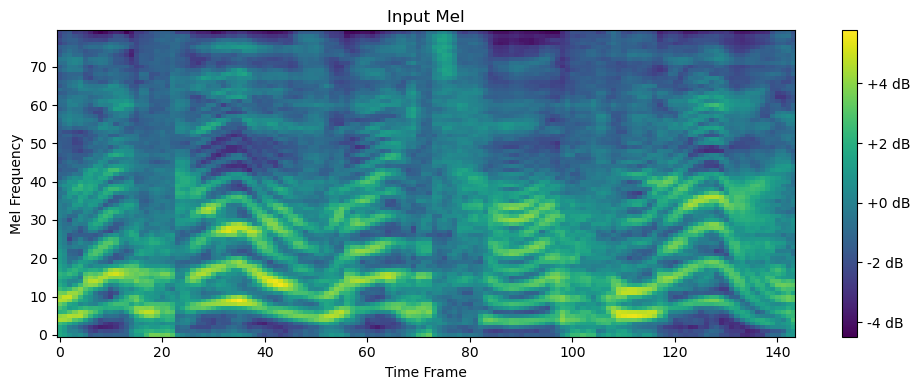

In [25]:
plot_mel(input_mel, "Input Mel")

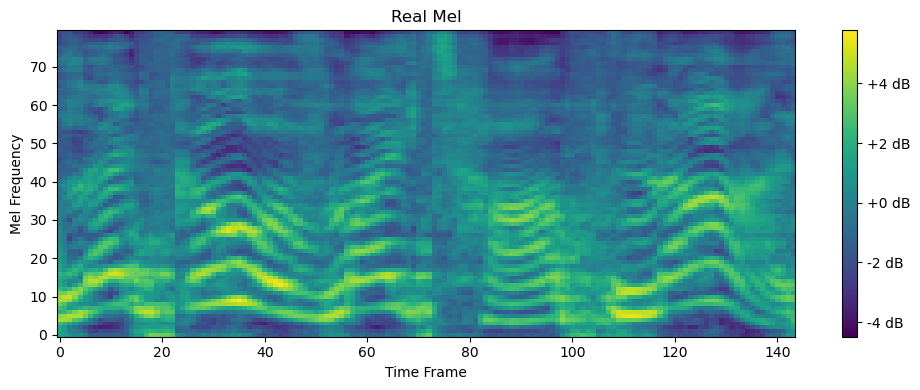

In [26]:
plot_mel(real_mel, "Real Mel")

In [27]:
vocoder = bundle_hifigan.get_vocoder()

In [28]:

input_mel_audio = vocoder(input_mel).squeeze(0).cpu().detach().numpy()
audio_display = Audio(input_mel_audio, rate=hparams.sampling_rate)
display(audio_display)

In [29]:
real_mel_audio = vocoder(real_mel).squeeze(0).cpu().detach().numpy()
audio_display = Audio(real_mel_audio, rate=hparams.sampling_rate)
display(audio_display)